# Assignment 2 - Network Connectivity

In this assignment you will go through the process of importing and analyzing an internal email communication network between employees of a mid-sized manufacturing company. 
Each node represents an employee and each directed edge between two nodes represents an individual email. The left node represents the sender and the right node represents the recipient. We will also store the timestamp of each email. 

In [8]:
import networkx as nx

#!head assets/email_network.txt

In [10]:
!pip install --upgrade networkx scipy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.2 which is incompatible.



  Using cached networkx-3.2.1-py3-none-any.whl (1.6 MB)
  Using cached scipy-1.11.4-cp39-cp39-win_amd64.whl (44.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: networkx
    Found existing installation: networkx 2.7.1
    Uninstalling networkx-2.7.1:
      Successfully uninstalled networkx-2.7.1


### Question 1

Using networkx, load up the directed multigraph from `assets/email_network.txt`. Make sure the node names are strings.

*This function should return a directed multigraph networkx graph.*

In [29]:
def answer_one():
    
    # YOUR CODE HERE
    G = nx.read_edgelist('email_network.txt', data=[('Time', int)], create_using=nx.MultiDiGraph())
    
    return G

G = answer_one()
G.edges(data = True)

OutMultiEdgeDataView([('1', '2', {'Time': 1262454010}), ('1', '2', {'Time': 1262604260}), ('1', '2', {'Time': 1262645364}), ('1', '2', {'Time': 1262734830}), ('1', '2', {'Time': 1262734947}), ('1', '2', {'Time': 1263245473}), ('1', '2', {'Time': 1263292625}), ('1', '2', {'Time': 1263849711}), ('1', '2', {'Time': 1264454347}), ('1', '2', {'Time': 1264977448}), ('1', '2', {'Time': 1265059841}), ('1', '2', {'Time': 1265146812}), ('1', '2', {'Time': 1265146987}), ('1', '2', {'Time': 1265666114}), ('1', '2', {'Time': 1266269559}), ('1', '2', {'Time': 1266578808}), ('1', '2', {'Time': 1266873984}), ('1', '2', {'Time': 1267426543}), ('1', '2', {'Time': 1267517814}), ('1', '2', {'Time': 1267569221}), ('1', '2', {'Time': 1267569382}), ('1', '2', {'Time': 1268090578}), ('1', '2', {'Time': 1268722287}), ('1', '2', {'Time': 1269297419}), ('1', '2', {'Time': 1269897916}), ('1', '2', {'Time': 1270072738}), ('1', '2', {'Time': 1270160068}), ('1', '2', {'Time': 1270245851}), ('1', '2', {'Time': 127024

In [ ]:
ans_one = answer_one()

### Question 2

How many employees are represented in the network?

How many `sender`->`recipient` pairs of employees are there in the network such that `sender` sent at least one email to `recipient`? Note that even if a `sender` sent multiple messages to a `recipient`, they should only be counted once. You should **not** exclude cases where an employee sent emails to themselves from this [email] count. 

*This function should return a tuple with two integers (#employees, # `sender`->`recipient` pairs).*

In [37]:
def answer_two():
    # YOUR CODE HERE
    G = answer_one()
    
    num_employees = len(G.nodes)
    num_pairs = sum(1 for edge in G.edges if edge[0] != edge[1])

    return num_employees, num_pairs

num_employees, num_pairs = answer_two()
print(num_employees)
print(num_pairs)

167
82876


In [ ]:
ans_two = answer_two()


### Question 3

* Part 1. Assume that information in this company can only be exchanged through email.

    When an employee sends an email to another employee, a communication channel has been created, allowing the sender to provide information to the reciever, but not viceversa. 

    Based on the emails sent in the data, is it possible for information to go from every employee to every other employee?


* Part 2. Now assume that a communication channel established by an email allows information to be exchanged both ways. 

    Based on the emails sent in the data, is it possible for information to go from every employee to every other employee?


*This function should return a tuple of bools (part1, part2).*

In [32]:
def answer_three():
    # YOUR CODE HERE
    G = answer_one()
    
    part1 = nx.is_strongly_connected(G)
    
    part2 = nx.is_weakly_connected(G)
    
    return part1, part2

print(answer_three())

(False, True)


In [ ]:
ans_three = answer_three()


### Question 4

How many nodes are in the largest weakly connected component of the graph?

*This function should return an int.*

In [35]:
def answer_four():
    # YOUR CODE HERE
    G = answer_one()
    
    weakly_connected_components = nx.weakly_connected_components(G)
    
    largest_weakly_connected_component = max(weakly_connected_components, key=len)

    return len(largest_weakly_connected_component)

print(answer_four())

167


In [ ]:
ans_four = answer_four()

### Question 5

How many nodes are in the largest strongly connected component?

*This function should return an int*

In [38]:
def answer_five():
    # YOUR CODE HERE
    G = answer_one()
    
    strongly_connected_components = nx.strongly_connected_components(G)
    
    largest_strongly_connected_component = max(strongly_connected_components, key=len)

    return len(largest_strongly_connected_component)

print(answer_five())
#     raise NotImplementedError()

126


In [ ]:
ans_five = answer_five()


### Question 6

Using the NetworkX functions `strongly_connected_components` and `subgraph`, find the subgraph of nodes in the largest strongly connected component. 
Call this graph G_sc.

*This function should return a networkx MultiDiGraph named G_sc.*

In [41]:
def answer_six():
    # YOUR CODE HERE
    graph = answer_one()
    
    strongly_connected_components = list(nx.strongly_connected_components(graph))

    # Get the largest strongly connected component
    largest_strongly_connected_component = max(strongly_connected_components, key=len)

    # Extract the subgraph corresponding to the largest strongly connected component
    G_sc = graph.subgraph(largest_strongly_connected_component).copy()

    return G_sc

G_sc = answer_six()

# Print the nodes and edges in G_sc
print("Nodes in G_sc:", G_sc.nodes())
print("Edges in G_sc:", G_sc.edges())
#     raise NotImplementedError()

Nodes in G_sc: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '115', '117', '118', '119', '120', '121', '122', '123', '124', '128', '129', '134', '149', '151']
Edges in G_sc: [('1', '2'), ('1', '2'), ('1', '2'), ('1', '2'), ('1', '2'), ('1', '2'), ('1', '2'), ('1', '2'), ('1', '2'), ('1', '2'), ('1', '2'), ('1', '2'), ('1', '2'), ('1', '2'), ('1', '2'), ('1', '2'), ('

In [74]:
ans_six = answer_six()
assert type(ans_six) == nx.MultiDiGraph , "Your return type should be a MultiDiGraph object"


### Question 7

What is the average distance between nodes in G_sc?

*This function should return a float.*

In [44]:
def answer_seven():
    # YOUR CODE HERE
    G_sc = answer_six()
    
    avg_dist = nx.average_shortest_path_length(G_sc)
    
    return avg_dist

print(answer_seven())
    
#     raise NotImplementedError()

1.6461587301587302


In [ ]:
ans_seven = answer_seven()


### Question 8

What is the largest possible distance between two employees in G_sc?

*This function should return an int.*

In [46]:
def answer_eight():
    # YOUR CODE HERE
    
    G_sc = answer_six()
    
    diameter = nx.diameter(G_sc)
    
    return diameter

print(answer_eight())
    #raise NotImplementedError()

3


In [47]:
ans_eight = answer_eight()


### Question 9

What is the set of nodes in G_sc with eccentricity equal to the diameter?

*This function should return a set of the node(s).*

In [52]:
def answer_nine():
    # YOUR CODE HERE
    G_sc = answer_six()
    
    eccentricities = nx.eccentricity(G_sc)

    # Find the diameter of the graph
    diameter = nx.diameter(G_sc, e=eccentricities)

    # Find nodes with eccentricity equal to the diameter
    nodes_ecc_equal_diameter = {node for node, eccentricity in eccentricities.items() if eccentricity == diameter}

    return nodes_ecc_equal_diameter

print(answer_nine())
    #raise NotImplementedError()

{'129', '134', '97'}


In [53]:
ans_nine = answer_nine()
assert type(ans_nine) == set, "Student answer must return a set"

### Question 10

What is the set of node(s) in G_sc with eccentricity equal to the radius?

*This function should return a set of the node(s).*

In [56]:
def answer_ten():
    # YOUR CODE HERE
    
    G_sc = answer_six()
    
    eccentricities = nx.eccentricity(G_sc)

    radius = nx.radius(G_sc, e=eccentricities)

    nodes_ecc_equal_radius = {node for node, eccentricity in eccentricities.items() if eccentricity == radius}

    return nodes_ecc_equal_radius
    #raise NotImplementedError()
    
print(answer_ten())

{'38'}


In [57]:
ans_ten = answer_ten()
assert type(ans_ten) == set, "Student answer must return a set"

### Question 11

Which node in G_sc has the most shortest paths to other nodes whose distance equal the diameter of G_sc?


For the node with the most such shortest paths, how many of these paths are there?


*This function should return a tuple (name of node, number of paths).*

In [62]:
def answer_eleven():
    # YOUR CODE HERE
    G_sc = answer_six()
    
    diameter = nx.diameter(G_sc)

    # Initialize variables to track the node with the most shortest paths
    most_paths_node = None
    most_paths_count = 0

    # Iterate over nodes in the graph
    for node in G_sc.nodes():
        # Calculate shortest paths from the current node
        shortest_paths = nx.single_source_shortest_path_length(G_sc, node)

        # Count the number of paths with distance equal to the diameter
        paths_distance_equal_diameter= sum(1 for path_length in shortest_paths.values() if path_length == diameter)

        # Update the variables if the current node has more paths
        if paths_distance_equal_diameter > most_paths_count:
            most_paths_node = node
            most_paths_count = paths_distance_equal_diameter

    return most_paths_node, most_paths_count

most_paths_node, most_paths_count = answer_eleven()
print(most_paths_node)
print(most_paths_count)
    #raise NotImplementedError()

97
63


In [63]:
ans_eleven = answer_eleven()
assert type(ans_eleven) == tuple, "Student answer must be a tuple"

### Question 12

Suppose you want to prevent communication flow from the node that you found in question 11 to node 10. What is the smallest number of nodes you would need to remove from the graph (you're not allowed to remove the node from the previous question or 10)? 

*This function should return an integer.*

In [67]:
def answer_twelve():
    # YOUR CODE HERE
    G_sc = answer_six()
    
    min_node_cut = nx.minimum_node_cut(G_sc, s = '97', t = '10')
    
    exclusion_set = {97, 10}
    
    min_node_cut -= exclusion_set
    
    return len(min_node_cut)

print(answer_twelve())
    #raise NotImplementedError()

1


In [ ]:
ans_twelve = answer_twelve()


### Question 13

Convert the graph G_sc into an undirected graph by removing the direction of the edges of G_sc. Call the new graph G_un. 


*This function should return a networkx Graph.*

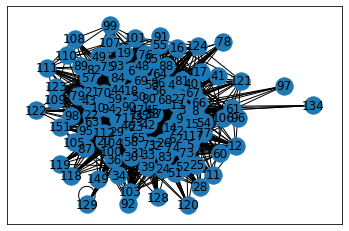

In [70]:
def answer_thirteen():
    # YOUR CODE HERE
    G_sc = answer_six()
    
    G = nx.to_undirected(G_sc)
    
    G_un = nx.Graph(G)
    
    return G_un
    
nx.draw_networkx(answer_thirteen())
    #raise NotImplementedError()

In [ ]:
ans_thirteen = answer_thirteen()
assert type(ans_thirteen) == nx.Graph , "Your return type should be a Graph object"


### Question 14

What is the transitivity and average clustering coefficient of graph G_un?

*This function should return a tuple (transitivity, avg clustering).*     
*Note: DO NOT round up your answer.*

In [71]:
def answer_fourteen():
    # YOUR CODE HERE
    G_un = answer_thirteen()
    
    transitivity = nx.transitivity(G_un)
    
    avg_cluster = nx.average_clustering(G_un)
    
    return transitivity, avg_cluster

transitivity, avg_cluster = answer_fourteen()
print(transitivity)
print(avg_cluster)
    #raise NotImplementedError()

0.570111160700385
0.6975272437231418


In [72]:
ans_fourteen = answer_fourteen()
assert type(ans_fourteen) == tuple, "Student answer must be a tuple"
